<a href="https://colab.research.google.com/github/aliwaki/KNH-projects/blob/main/MONITORING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_name = 'KNH - Utilities Monitoring Chart.xlsx'

In [4]:
oxygen_df = pd.read_excel(file_name, sheet_name='Oxygen Consumption ')
# display first few rows
print(oxygen_df.head())

                     U                     .1             .2           .3  \
0                  NaN            NaN     NaN            NaN          NaN   
1                  NaN            NaN     NaN            NaN          NaN   
2                 Date  Open Balance   Refill  Volume Total   Consumption   
3  2024-07-01 00:00:00            NaN     NaN              0            0   
4  2024-07-02 00:00:00            NaN     NaN              0            0   

         .4                 .5                 .6        General   \
0       NaN                NaN     Cost Per Litre              80   
1       NaN                NaN     Daily Package             5000   
2  Balance   Patients Plugged   Consumption (Kes)  Purchase (Kes)   
3         0                NaN                  0               0   
4         0                NaN                  0               0   

           KPCC   ...  .15  .16   .17   .18   .19   .20   .21   .22   .23  \
0            NaN  ...  NaN  NaN   NaN   NaN  

In [5]:
# drop empty rows and columns
oxygen_df = oxygen_df.dropna(how='all')
oxygen_df = oxygen_df.dropna(axis=1, how='all')

In [15]:
# rename columns for easier acccess
print(oxygen_df.shape)
oxygen_df.columns = [
    'Date', 'Open Balance', 'Refill', 'Volume Total', 'Consumption',
    'Balance', 'Patients Plugged', 'Consumption (Kes)', 'Purchase (Kes)',
    'Balance (Kes)', 'Revenue (Kes)', 'Extra Column' # Added 'Extra Column' based on the error message indicating 12 columns
]

# Drop the row where the 'Date' column is the string 'Date'
oxygen_df = oxygen_df[oxygen_df['Date'] != 'Date'].reset_index(drop=True)

# Display the first few rows with the new header and removed header row
print(oxygen_df.head())

(285, 12)
                  Date Open Balance Refill Volume Total Consumption Balance  \
0  2024-07-01 00:00:00            0      0            0           0       0   
1  2024-07-02 00:00:00            0      0            0           0       0   
2  2024-07-03 00:00:00            0      0            0           0       0   
3  2024-07-04 00:00:00            0      0            0           0       0   
4  2024-07-05 00:00:00            0      0            0           0       0   

  Patients Plugged Consumption (Kes) Purchase (Kes) Balance (Kes)  \
0                0                 0              0             0   
1                0                 0              0             0   
2                0                 0              0             0   
3                0                 0              0             0   
4                0                 0              0             0   

  Revenue (Kes) Extra Column  
0             0          NaN  
1             0          NaN  
2      

In [16]:
# convert 'date' to datetime
print(oxygen_df.columns)
oxygen_df['Date'] = pd.to_datetime(oxygen_df['Date'])

Index(['Date', 'Open Balance', 'Refill', 'Volume Total', 'Consumption',
       'Balance', 'Patients Plugged', 'Consumption (Kes)', 'Purchase (Kes)',
       'Balance (Kes)', 'Revenue (Kes)', 'Extra Column'],
      dtype='object')


In [17]:
# Calculate daily consumption
oxygen_df['Daily Consumption'] = oxygen_df['Consumption'].diff().fillna(oxygen_df['Consumption'])

# Display daily consumption
display(oxygen_df[['Date', 'Daily Consumption']].head())

/tmp/ipython-input-17-661392883.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  oxygen_df['Daily Consumption'] = oxygen_df['Consumption'].diff().fillna(oxygen_df['Consumption'])


,Date,Daily Consumption
0,2024-07-01,0
1,2024-07-02,0
2,2024-07-03,0
3,2024-07-04,0
4,2024-07-05,0


In [18]:

# Drop rows where 'Date' is missing (if any)
oxygen_df = oxygen_df.dropna(subset=['Date'])

# Fill missing numeric values with 0 (or appropriate method)
numeric_cols = ['Open Balance', 'Refill', 'Consumption', 'Patients Plugged', 'Consumption (Kes)', 'Purchase (Kes)', 'Revenue (Kes)']
oxygen_df[numeric_cols] = oxygen_df[numeric_cols].fillna(0)

# Display cleaned data
print(oxygen_df.head())

        Date  Open Balance  Refill Volume Total  Consumption Balance  \
0 2024-07-01             0       0            0            0       0   
1 2024-07-02             0       0            0            0       0   
2 2024-07-03             0       0            0            0       0   
3 2024-07-04             0       0            0            0       0   
4 2024-07-05             0       0            0            0       0   

   Patients Plugged  Consumption (Kes)  Purchase (Kes) Balance (Kes)  \
0                 0                  0               0             0   
1                 0                  0               0             0   
2                 0                  0               0             0   
3                 0                  0               0             0   
4                 0                  0               0             0   

   Revenue (Kes) Extra Column  Daily Consumption  
0              0          NaN                  0  
1              0          NaN   

/tmp/ipython-input-18-2603340238.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  oxygen_df[numeric_cols] = oxygen_df[numeric_cols].fillna(0)


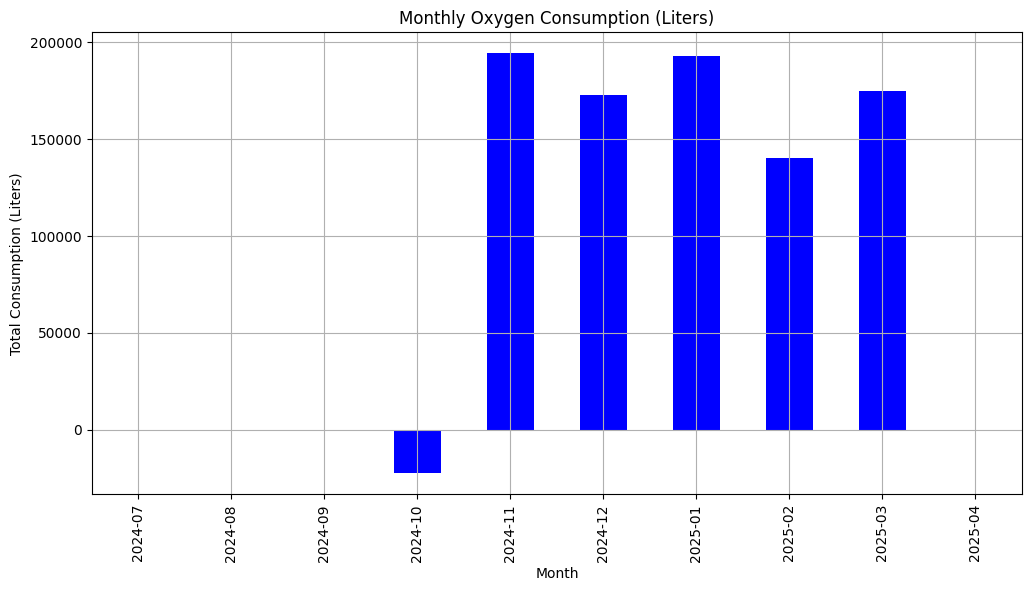

In [19]:
# Ensure 'Date' column is in datetime format
oxygen_df['Date'] = pd.to_datetime(oxygen_df['Date'])

# Group by month and sum consumption
monthly_consumption = oxygen_df.groupby(oxygen_df['Date'].dt.to_period('M'))['Consumption'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_consumption.plot(kind='bar', color='blue')
plt.title('Monthly Oxygen Consumption (Liters)')
plt.xlabel('Month')
plt.ylabel('Total Consumption (Liters)')
plt.grid(True)
plt.show()

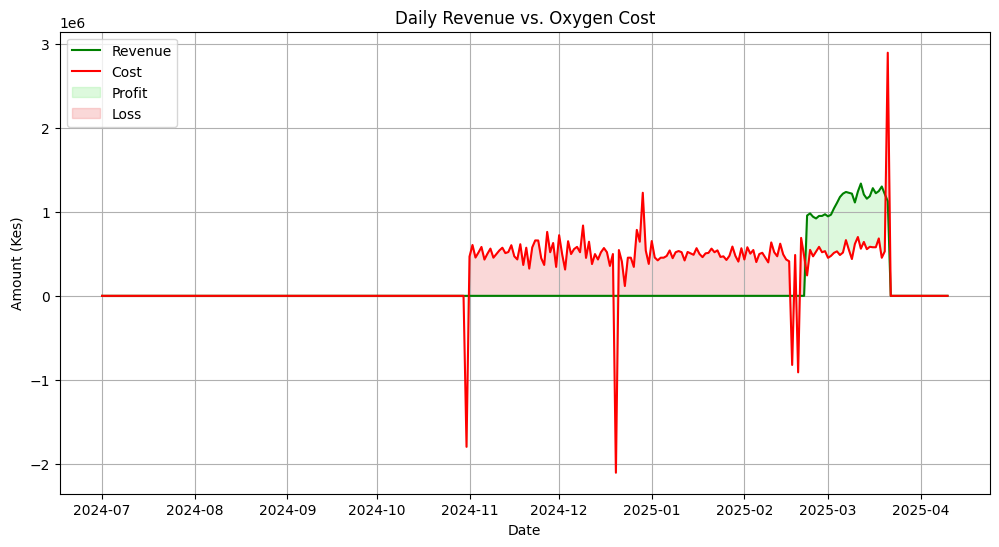

In [20]:
# Calculate profit
oxygen_df['Profit (Kes)'] = oxygen_df['Revenue (Kes)'] - oxygen_df['Consumption (Kes)']

# Plot revenue vs. consumption
plt.figure(figsize=(12, 6))
plt.plot(oxygen_df['Date'], oxygen_df['Revenue (Kes)'], label='Revenue', color='green')
plt.plot(oxygen_df['Date'], oxygen_df['Consumption (Kes)'], label='Cost', color='red')
plt.fill_between(oxygen_df['Date'], oxygen_df['Revenue (Kes)'], oxygen_df['Consumption (Kes)'],
                 where=(oxygen_df['Revenue (Kes)'] > oxygen_df['Consumption (Kes)']),
                 color='lightgreen', alpha=0.3, label='Profit')
plt.fill_between(oxygen_df['Date'], oxygen_df['Revenue (Kes)'], oxygen_df['Consumption (Kes)'],
                 where=(oxygen_df['Revenue (Kes)'] <= oxygen_df['Consumption (Kes)']),
                 color='lightcoral', alpha=0.3, label='Loss')
plt.title('Daily Revenue vs. Oxygen Cost')
plt.xlabel('Date')
plt.ylabel('Amount (Kes)')
plt.legend()
plt.grid(True)
plt.show()

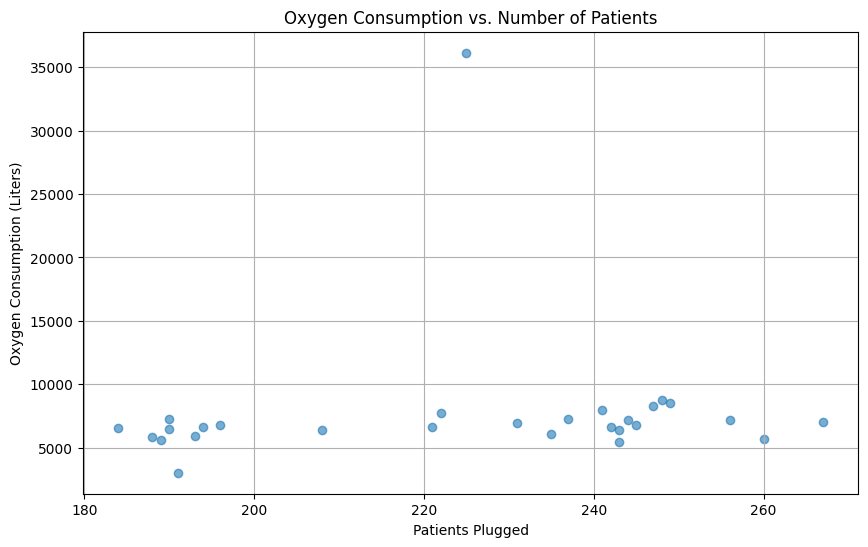

Correlation between Patients and Consumption: 0.09


In [30]:
# Filter days where patients were recorded
patient_data = oxygen_df[oxygen_df['Patients Plugged'] > 0]

# Scatter plot: Patients vs. Consumption
plt.figure(figsize=(10, 6))
plt.scatter(patient_data['Patients Plugged'], patient_data['Consumption'], alpha=0.6)
plt.title('Oxygen Consumption vs. Number of Patients')
plt.xlabel('Patients Plugged')
plt.ylabel('Oxygen Consumption (Liters)')
plt.grid(True)
plt.show()

# Calculate correlation
correlation = patient_data[['Patients Plugged', 'Consumption']].corr().iloc[0,1]
print(f"Correlation between Patients and Consumption: {correlation:.2f}")

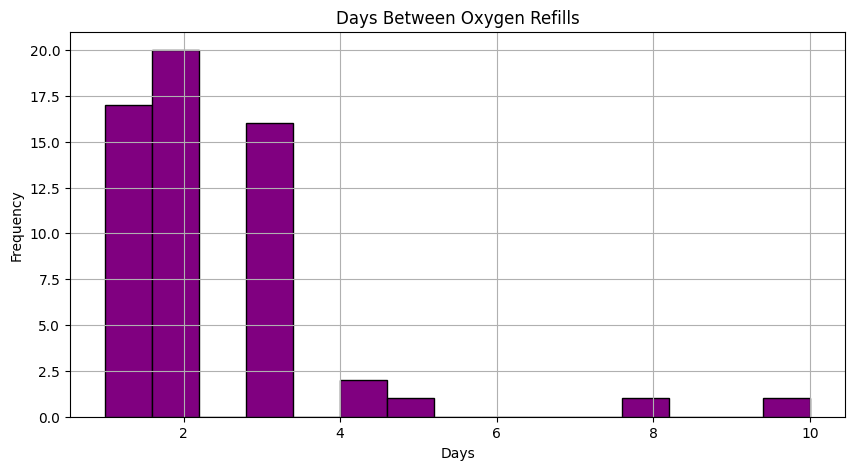

In [32]:
# Days between refills (assuming refill > 0 means a refill happened)
refill_dates = oxygen_df[oxygen_df['Refill'] > 0]['Date']
days_between_refills = refill_dates.diff().dt.days.dropna()

# Plot refill frequency
plt.figure(figsize=(10, 5))
plt.hist(days_between_refills, bins=15, color='purple', edgecolor='black')
plt.title('Days Between Oxygen Refills')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

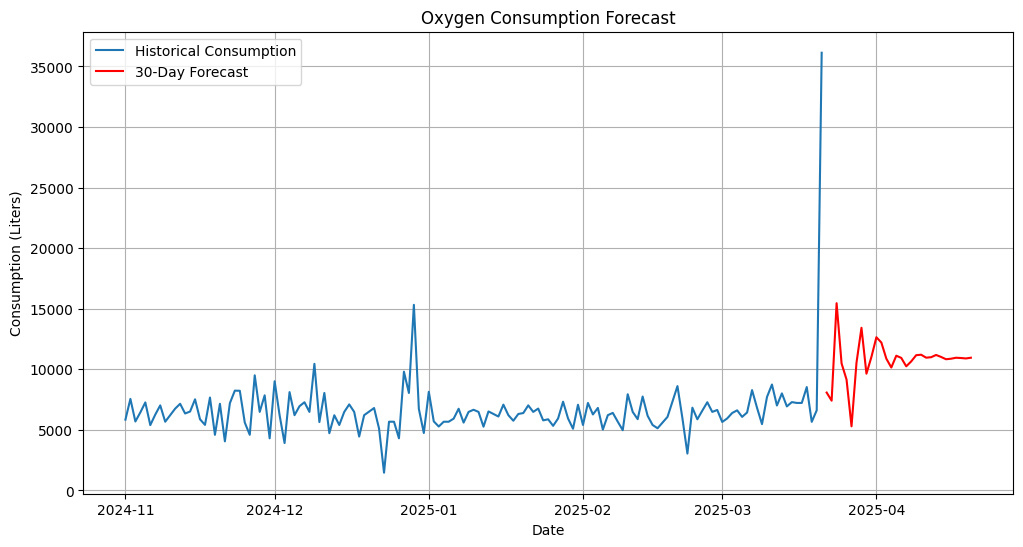

In [33]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings

# Prepare data (daily consumption)
ts_data = oxygen_df.set_index('Date')['Consumption']
ts_data = ts_data[ts_data > 0]  # Remove zero-consumption days

# Fit ARIMA model
model = ARIMA(ts_data, order=(7, 1, 1))  # Adjust order as needed
model_fit = model.fit()

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(ts_data.index, ts_data, label='Historical Consumption')
plt.plot(pd.date_range(ts_data.index[-1], periods=31)[1:], forecast, label='30-Day Forecast', color='red')
plt.title('Oxygen Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Consumption (Liters)')
plt.legend()
plt.grid(True)
plt.show()

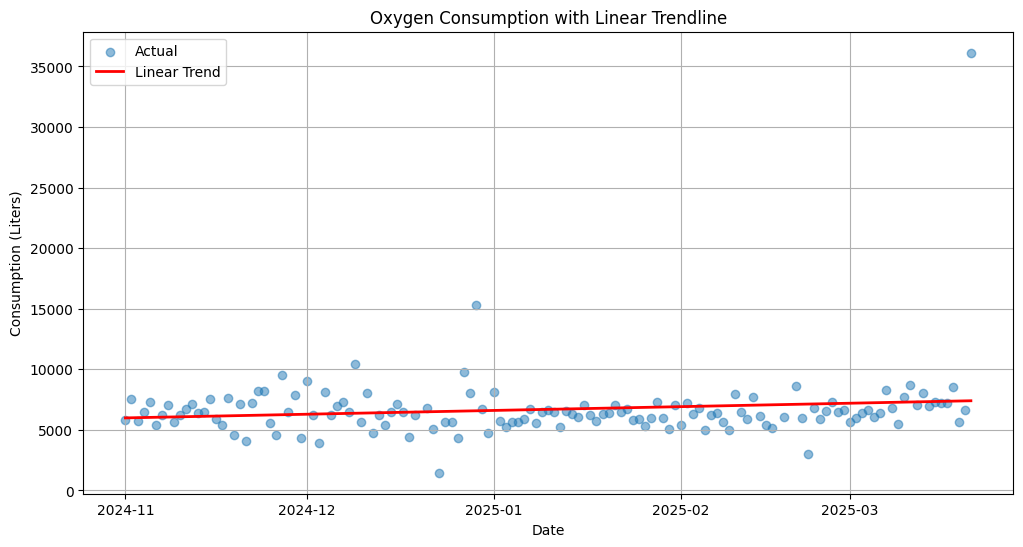

Trendline Equation: Consumption = 10.10*Days + 5985.00


In [34]:
# simple linear trendlines(overall trends)
import numpy as np
from sklearn.linear_model import LinearRegression

# Prepare data (using daily consumption)
trend_data = oxygen_df[oxygen_df['Consumption'] > 0][['Date', 'Consumption']]
trend_data['Days'] = (trend_data['Date'] - trend_data['Date'].min()).dt.days

# Fit linear regression
X = trend_data[['Days']]
y = trend_data['Consumption']
model = LinearRegression().fit(X, y)
trend_data['Trend'] = model.predict(X)

# Plot with trendline
plt.figure(figsize=(12,6))
plt.scatter(trend_data['Date'], trend_data['Consumption'], alpha=0.5, label='Actual')
plt.plot(trend_data['Date'], trend_data['Trend'], color='red', linewidth=2, label='Linear Trend')
plt.title('Oxygen Consumption with Linear Trendline')
plt.xlabel('Date')
plt.ylabel('Consumption (Liters)')
plt.legend()
plt.grid(True)
plt.show()

# Display trend equation
slope = model.coef_[0]
intercept = model.intercept_
print(f"Trendline Equation: Consumption = {slope:.2f}*Days + {intercept:.2f}")

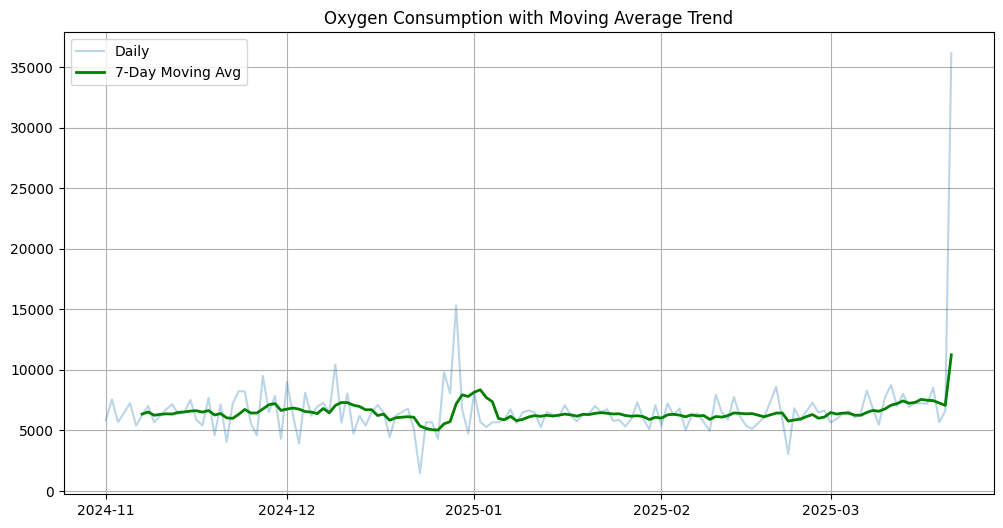

In [35]:
# Calculate 7-day moving average
trend_data['7D_MA'] = trend_data['Consumption'].rolling(window=7).mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(trend_data['Date'], trend_data['Consumption'], alpha=0.3, label='Daily')
plt.plot(trend_data['Date'], trend_data['7D_MA'], color='green', linewidth=2, label='7-Day Moving Avg')
plt.title('Oxygen Consumption with Moving Average Trend')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# # polynomial trendline(curved trends)

# # Create polynomial features
# poly = PolynomialFeatures(degree=2)
# X_poly = poly.fit_transform(X)
# poly_model = LinearRegression().fit(X_poly, y)
# trend_data['Poly_Trend'] = poly_model.predict(X_poly)

# # Plot
# plt.figure(figsize=(12,6))
# plt.scatter(trend_data['Date'], trend_data['Consumption'], alpha=0.5)
# plt.plot(trend_data['Date'], trend_data['Poly_Trend'], color='purple', linewidth=2, label='Quadratic Trend')
# plt.title('Polynomial Trendline Analysis')
# plt.legend()
# plt.grid(True)
# plt.show()

NameError: name 'PolynomialFeatures' is not defined

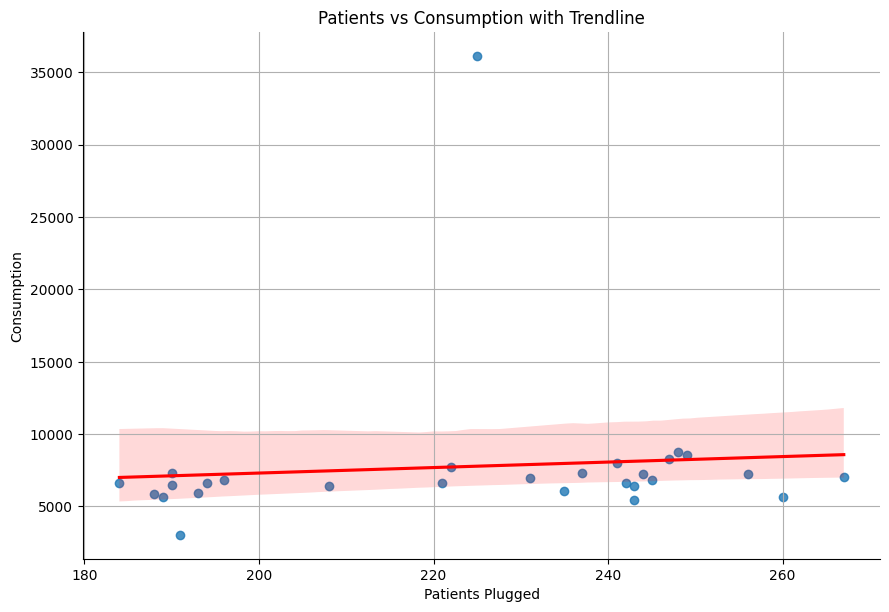

In [39]:
# For patient vs consumption analysis
import seaborn as sns
patient_data = oxygen_df[oxygen_df['Patients Plugged'] > 0]

# Linear trend
sns.lmplot(x='Patients Plugged', y='Consumption', data=patient_data,
           line_kws={'color': 'red'}, height=6, aspect=1.5)
plt.title('Patients vs Consumption with Trendline')
plt.grid(True)
plt.show()

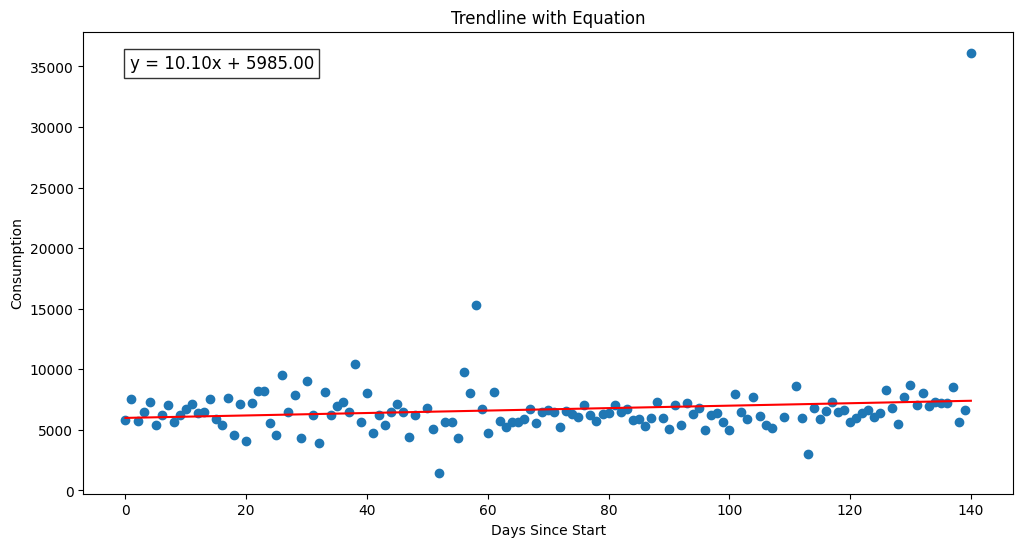

In [40]:

# For any matplotlib plot, add equation annotation
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(trend_data['Days'], trend_data['Consumption'])
ax.plot(trend_data['Days'], trend_data['Trend'], color='red')

# Add equation text
eq_text = f'y = {slope:.2f}x + {intercept:.2f}'
ax.text(0.05, 0.95, eq_text, transform=ax.transAxes,
        fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

plt.title('Trendline with Equation')
plt.xlabel('Days Since Start')
plt.ylabel('Consumption')
plt.show()

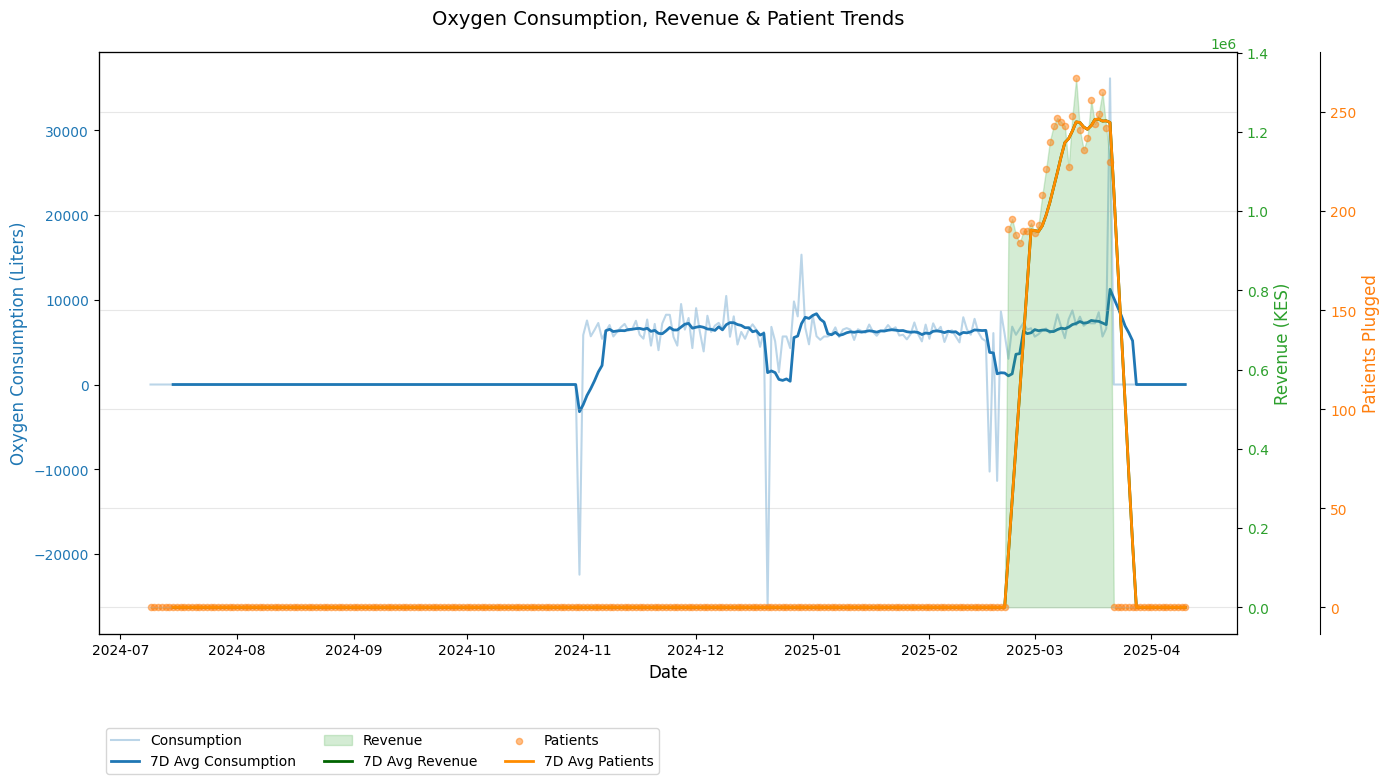

In [41]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# Consumption (Left Y-axis)
color = 'tab:blue'
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Oxygen Consumption (Liters)', color=color, fontsize=12)
ax1.plot(oxygen_df['Date'], oxygen_df['Consumption'],
         color=color, alpha=0.3, label='Consumption')
ax1.plot(oxygen_df['Date'], oxygen_df['Consumption'].rolling(7).mean(),
         color=color, linewidth=2, label='7D Avg Consumption')
ax1.tick_params(axis='y', labelcolor=color)

# Revenue (Right Y-axis)
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Revenue (KES)', color=color, fontsize=12)
ax2.fill_between(oxygen_df['Date'], oxygen_df['Revenue (Kes)'],
                 color=color, alpha=0.2, label='Revenue')
ax2.plot(oxygen_df['Date'], oxygen_df['Revenue (Kes)'].rolling(7).mean(),
         color='darkgreen', linewidth=2, label='7D Avg Revenue')
ax2.tick_params(axis='y', labelcolor=color)

# Patients (Right Y-axis, secondary)
ax3 = ax1.twinx()
color = 'tab:orange'
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Patients Plugged', color=color, fontsize=12)
ax3.scatter(oxygen_df['Date'], oxygen_df['Patients Plugged'],
            color=color, alpha=0.5, s=20, label='Patients')
ax3.plot(oxygen_df['Date'], oxygen_df['Patients Plugged'].rolling(7).mean(),
         color='darkorange', linewidth=2, label='7D Avg Patients')
ax3.tick_params(axis='y', labelcolor=color)

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3,
           loc='upper left', bbox_to_anchor=(0, -0.15), ncol=3)

plt.title('Oxygen Consumption, Revenue & Patient Trends', fontsize=14, pad=20)
plt.grid(alpha=0.3)
fig.tight_layout()
plt.show()

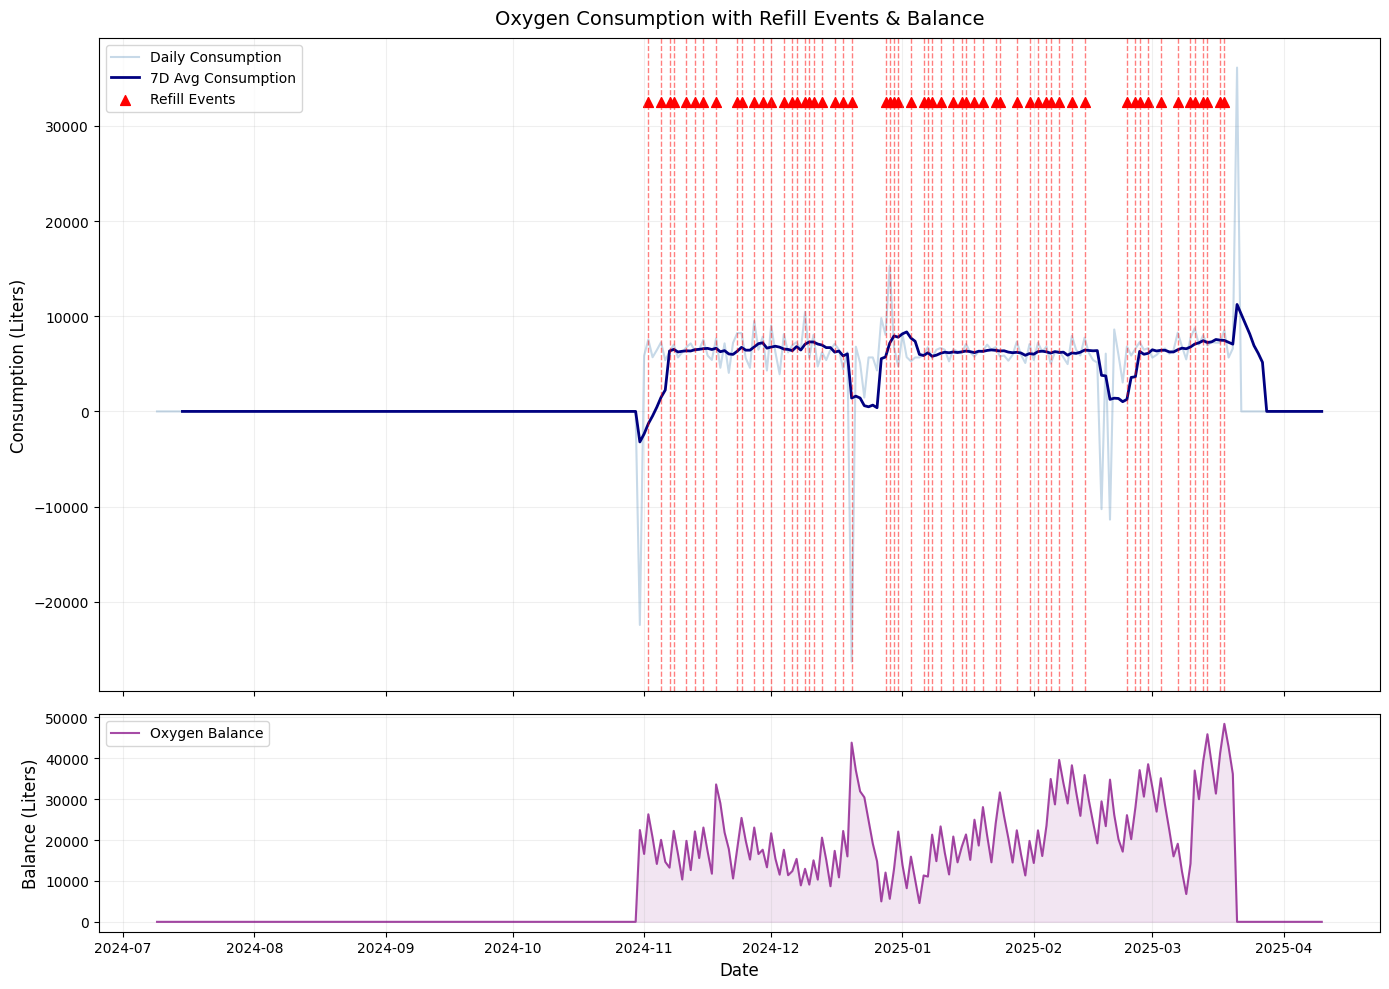

In [43]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True,
                              gridspec_kw={'height_ratios': [3, 1]})

# Consumption (Top)
ax1.plot(oxygen_df['Date'], oxygen_df['Consumption'],
         color='steelblue', alpha=0.3, label='Daily Consumption')
ax1.plot(oxygen_df['Date'], oxygen_df['Consumption'].rolling(7).mean(),
         color='navy', linewidth=2, label='7D Avg Consumption')

# Refill Events (Top)
refill_dates = oxygen_df[oxygen_df['Refill'] > 0]['Date']
for date in refill_dates:
    ax1.axvline(x=date, color='red', linestyle='--', alpha=0.5, linewidth=1)
ax1.scatter(refill_dates, [oxygen_df['Consumption'].max()*0.9]*len(refill_dates),
            color='red', marker='^', s=50, label='Refill Events')

# Convert 'Balance' to numeric and fill NaN before plotting
oxygen_df['Balance'] = pd.to_numeric(oxygen_df['Balance'], errors='coerce').fillna(0)

# Balance (Bottom)
ax2.plot(oxygen_df['Date'], oxygen_df['Balance'],
         color='purple', alpha=0.7, label='Oxygen Balance')
ax2.fill_between(oxygen_df['Date'], oxygen_df['Balance'],
                 color='purple', alpha=0.1)
# ax2.axhline(y=optimal_refill_point, color='orange', linestyle='--',
#             label=f'Refill Threshold ({optimal_refill_point:.0f}L)') # Commenting out this line as optimal_refill_point is not defined

# Formatting
ax1.set_title('Oxygen Consumption with Refill Events & Balance', fontsize=14, pad=10)
ax1.set_ylabel('Consumption (Liters)', fontsize=12)
ax2.set_ylabel('Balance (Liters)', fontsize=12)
ax2.set_xlabel('Date', fontsize=12)
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)
plt.tight_layout()
plt.show()

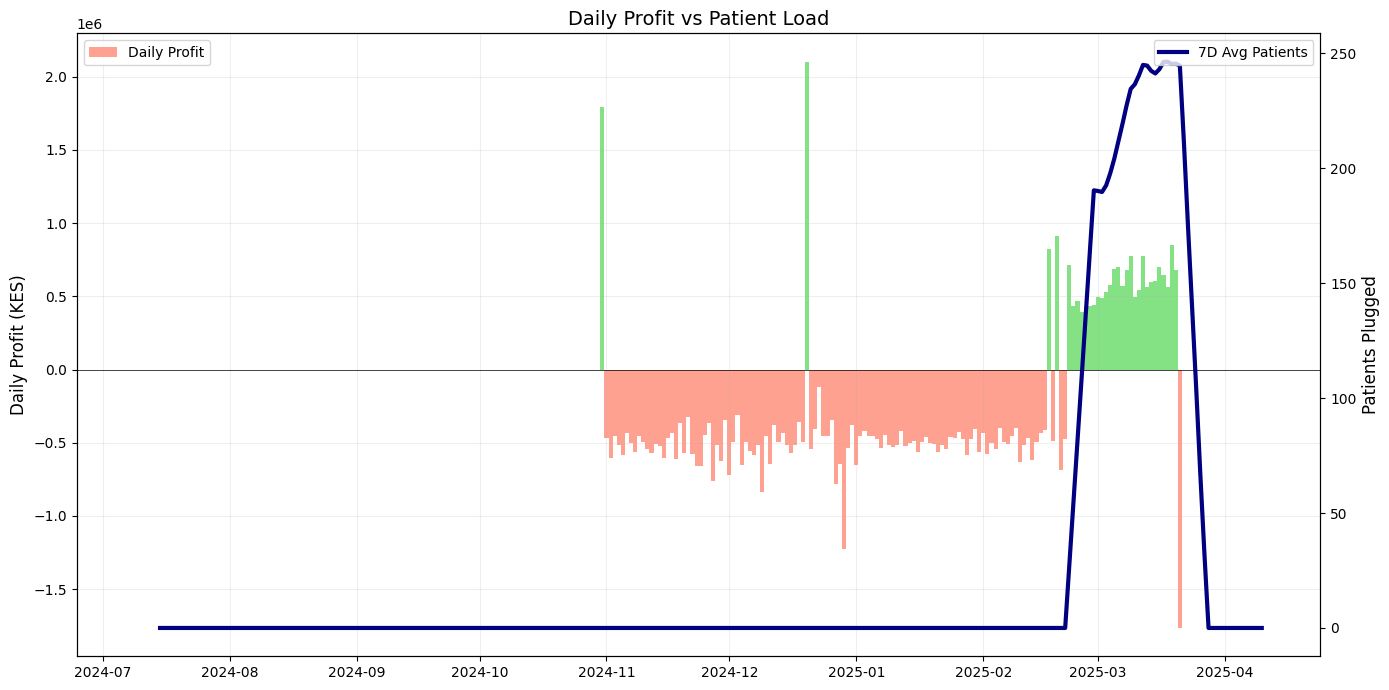

In [44]:
# Calculate daily profit
oxygen_df['Daily Profit'] = oxygen_df['Revenue (Kes)'] - oxygen_df['Consumption (Kes)']

fig, ax1 = plt.subplots(figsize=(14, 7))

# Profit Bars
ax1.bar(oxygen_df['Date'], oxygen_df['Daily Profit'],
        color=np.where(oxygen_df['Daily Profit']>0, 'limegreen', 'tomato'),
        alpha=0.6, width=1, label='Daily Profit')
ax1.axhline(0, color='black', linewidth=0.5)
ax1.set_ylabel('Daily Profit (KES)', fontsize=12)

# Patient Line
ax2 = ax1.twinx()
ax2.plot(oxygen_df['Date'], oxygen_df['Patients Plugged'].rolling(7).mean(),
         color='navy', linewidth=3, label='7D Avg Patients')
ax2.set_ylabel('Patients Plugged', fontsize=12)

# Formatting
plt.title('Daily Profit vs Patient Load', fontsize=14)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(alpha=0.2)
plt.tight_layout()
plt.show()

In [45]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=oxygen_df['Date'],
           y=oxygen_df['Consumption'],
           name='Consumption',
           marker_color='lightblue',
           opacity=0.5),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=oxygen_df['Date'],
               y=oxygen_df['Revenue (Kes)'],
               name='Revenue',
               line=dict(color='green', width=2)),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=oxygen_df['Date'],
               y=oxygen_df['Patients Plugged'],
               name='Patients',
               line=dict(color='orange', width=2),
               visible='legendonly'),
    secondary_y=True,
)

# Add refill events
fig.add_trace(
    go.Scatter(x=refill_dates,
               y=[oxygen_df['Consumption'].max()]*len(refill_dates),
               mode='markers',
               name='Refill Events',
               marker=dict(color='red', size=8, symbol='triangle-up')),
    secondary_y=False
)

# Format layout
fig.update_layout(
    title_text='Oxygen Consumption Dashboard',
    hovermode='x unified',
    template='plotly_white',
    height=600
)

fig.update_yaxes(title_text="Consumption (Liters)", secondary_y=False)
fig.update_yaxes(title_text="Revenue/Patients", secondary_y=True)

fig.show()

Recommended refill when stock reaches: 42538.16 liters


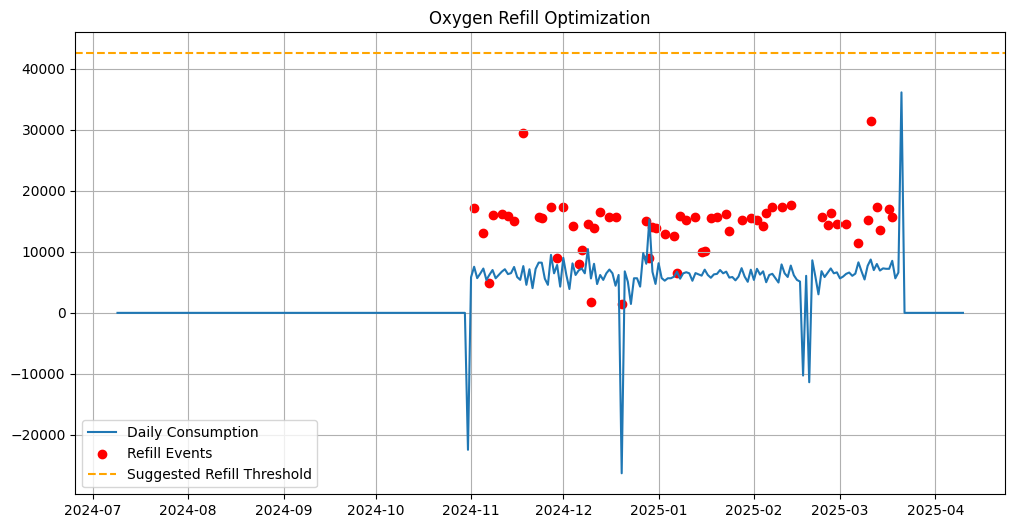

In [46]:
# Extract refill events and consumption rates
refills = oxygen_df[oxygen_df['Refill'] > 0][['Date', 'Refill']]
daily_consumption = oxygen_df.groupby('Date')['Consumption'].sum()

# Calculate days between refills and average daily consumption
refills['Days Since Last Refill'] = refills['Date'].diff().dt.days
refills['Avg Daily Consumption'] = [daily_consumption.loc[refills.iloc[i-1]['Date']:date].mean()
                                   for i, date in enumerate(refills['Date'])]

# Calculate optimal refill threshold (safety stock approach)
safety_factor = 1.5  # Adjust based on risk tolerance
avg_lead_time = 2    # Estimated days to get a refill
optimal_refill_point = (refills['Avg Daily Consumption'].mean() *
                       (refills['Days Since Last Refill'].mean() + avg_lead_time) * safety_factor)

print(f"Recommended refill when stock reaches: {optimal_refill_point:.2f} liters")

# Visualize refill patterns vs consumption
plt.figure(figsize=(12,6))
plt.plot(daily_consumption.index, daily_consumption, label='Daily Consumption')
plt.scatter(refills['Date'], refills['Refill'], color='red', label='Refill Events')
plt.axhline(y=optimal_refill_point, color='orange', linestyle='--', label='Suggested Refill Threshold')
plt.title('Oxygen Refill Optimization')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

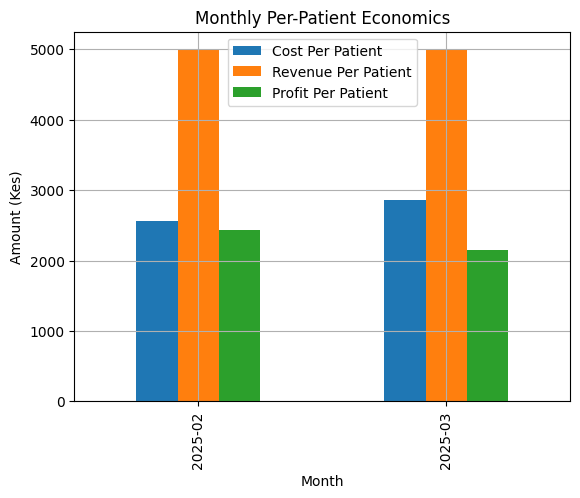


Top 5 Most Profitable Days:
          Date  Patients Plugged  Profit Per Patient
228 2025-02-22               191         3726.701571
253 2025-03-19               260         3258.461538
243 2025-03-09               243         3199.176955
239 2025-03-05               235         2933.617021
246 2025-03-12               267         2899.625468

Top 5 Least Profitable Days:
          Date  Patients Plugged  Profit Per Patient
255 2025-03-21               225        -7846.222222
232 2025-02-26               190         1935.157895
231 2025-02-25               184         2136.521739
245 2025-03-11               248         2180.322581
229 2025-02-23               196         2212.244898


In [47]:
#  Cost Per Patient Analysis

# Filter days with patient data
patient_days = oxygen_df[oxygen_df['Patients Plugged'] > 0]

# Calculate metrics
patient_days['Cost Per Patient'] = patient_days['Consumption (Kes)'] / patient_days['Patients Plugged']
patient_days['Revenue Per Patient'] = patient_days['Revenue (Kes)'] / patient_days['Patients Plugged']
patient_days['Profit Per Patient'] = patient_days['Profit (Kes)'] / patient_days['Patients Plugged']

# Monthly averages
monthly_patient_stats = patient_days.groupby(patient_days['Date'].dt.to_period('M')).agg({
    'Cost Per Patient': 'mean',
    'Revenue Per Patient': 'mean',
    'Profit Per Patient': 'mean'
})

# Plot results
plt.figure(figsize=(12,6))
monthly_patient_stats.plot(kind='bar')
plt.title('Monthly Per-Patient Economics')
plt.ylabel('Amount (Kes)')
plt.xlabel('Month')
plt.grid(True)
plt.show()

# Identify most/least profitable days
print("\nTop 5 Most Profitable Days:")
print(patient_days.nlargest(5, 'Profit Per Patient')[['Date', 'Patients Plugged', 'Profit Per Patient']])

print("\nTop 5 Least Profitable Days:")
print(patient_days.nsmallest(5, 'Profit Per Patient')[['Date', 'Patients Plugged', 'Profit Per Patient']])

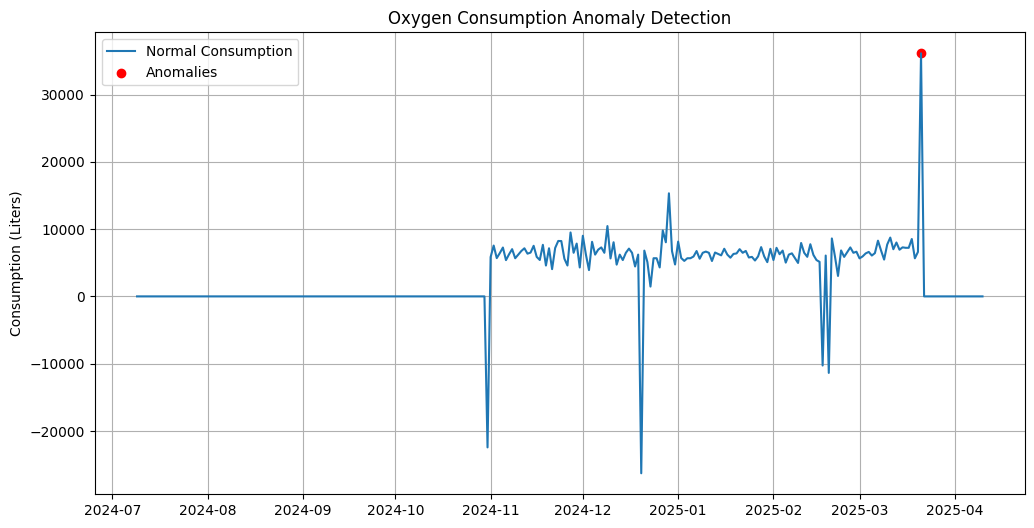


Detected Consumption Anomalies:
          Date  Consumption  Patients Plugged
255 2025-03-21        36130               225


In [49]:
from scipy import stats
import numpy as np

# Calculate z-scores for consumption on the entire column
consumption = oxygen_df['Consumption']
z_scores = np.abs(stats.zscore(consumption))

# Set threshold for anomalies (3 standard deviations)
threshold = 3
anomalies = oxygen_df.loc[(z_scores > threshold) & (oxygen_df['Consumption'] > 0)]

# Plot with anomalies highlighted
plt.figure(figsize=(12,6))
plt.plot(oxygen_df['Date'], oxygen_df['Consumption'], label='Normal Consumption')
plt.scatter(anomalies['Date'], anomalies['Consumption'], color='red', label='Anomalies')
plt.title('Oxygen Consumption Anomaly Detection')
plt.ylabel('Consumption (Liters)')
plt.legend()
plt.grid(True)
plt.show()

# Investigate anomalies
print("\nDetected Consumption Anomalies:")
print(anomalies[['Date', 'Consumption', 'Patients Plugged']])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5k5ta4y7/9wp7n7x0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5k5ta4y7/qajyhvau.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24775', 'data', 'file=/tmp/tmp5k5ta4y7/9wp7n7x0.json', 'init=/tmp/tmp5k5ta4y7/qajyhvau.json', 'output', 'file=/tmp/tmp5k5ta4y7/prophet_modelifbfzjp_/prophet_model-20250711130229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:02:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:02:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


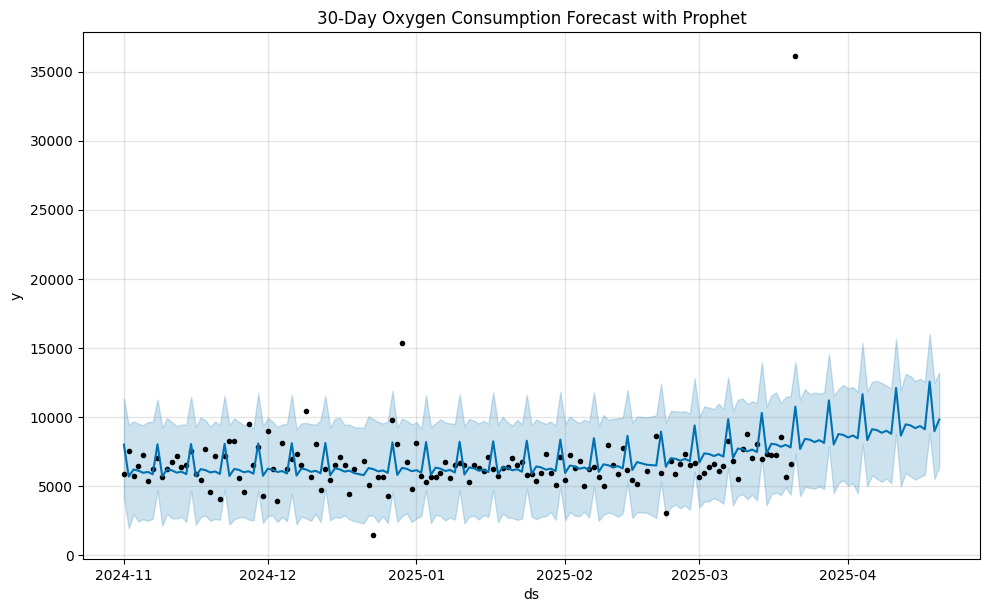

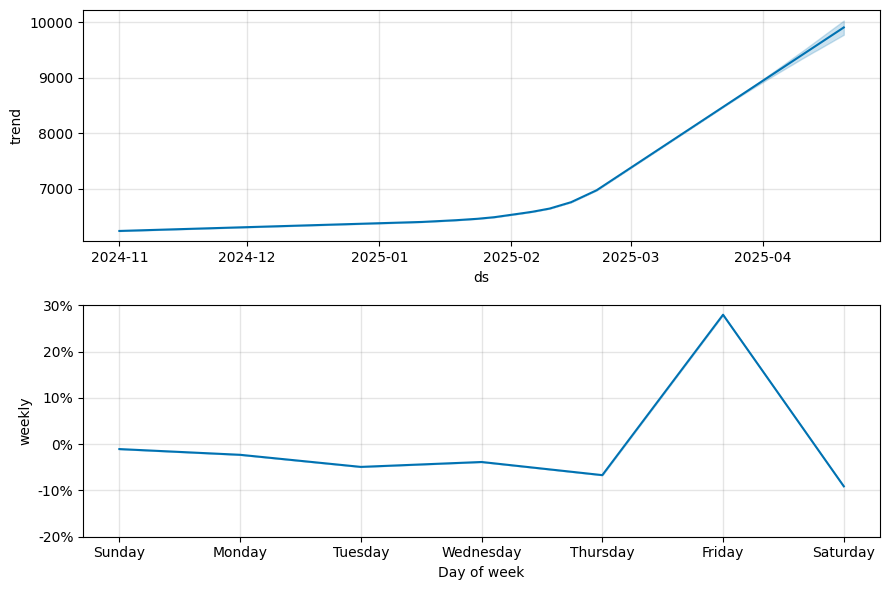

In [50]:
!pip install prophet
from prophet import Prophet

# Prepare data for Prophet
forecast_data = oxygen_df[['Date', 'Consumption']].rename(columns={'Date': 'ds', 'Consumption': 'y'})
forecast_data = forecast_data[forecast_data['y'] > 0]  # Remove zero-consumption days

# Create and fit model
model = Prophet(seasonality_mode='multiplicative')
model.fit(forecast_data)

# Make future dataframe (30 days)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title('30-Day Oxygen Consumption Forecast with Prophet')
plt.show()

# Plot components
fig2 = model.plot_components(forecast)
plt.show()

In [51]:
# Generate comprehensive report
report = f"""
Oxygen Consumption Analysis Report
=================================

1. Refill Optimization:
- Recommended refill threshold: {optimal_refill_point:.2f} liters
- Average days between refills: {refills['Days Since Last Refill'].mean():.1f} days

2. Patient Economics:
- Average cost per patient: {patient_days['Cost Per Patient'].mean():.2f} Kes
- Average revenue per patient: {patient_days['Revenue Per Patient'].mean():.2f} Kes
- Average profit per patient: {patient_days['Profit Per Patient'].mean():.2f} Kes

3. Anomaly Detection:
- Found {len(anomalies)} abnormal consumption days
- Highest anomaly: {anomalies['Consumption'].max():.2f} liters on {anomalies['Date'].max().strftime('%Y-%m-%d')}
"""

print(report)

# Save all results
with open('oxygen_analysis_report.txt', 'w') as f:
    f.write(report)

oxygen_df.to_csv('enhanced_oxygen_data.csv', index=False)


Oxygen Consumption Analysis Report

1. Refill Optimization:
- Recommended refill threshold: 42538.16 liters
- Average days between refills: 2.3 days

2. Patient Economics:
- Average cost per patient: 2782.33 Kes
- Average revenue per patient: 5000.00 Kes
- Average profit per patient: 2217.67 Kes

3. Anomaly Detection:
- Found 1 abnormal consumption days
- Highest anomaly: 36130.00 liters on 2025-03-21

